# Content and Objective

+ Show how Fourier and discrete Fourier transform are defined
+ Understand how the Fourier transform can be expressed
+ User may define signals in time domain
+ Amplitude response and phase response will be plotted

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy import signal as sig 

# Reminder:

### Definition of Fourier Transform



Analysis of a signal with the Fourier transform:
$$
X(f)=\left<x(t),\mathrm{e}^{\mathrm{j}2\pi ft}\right>_t=\int_{-\infty}^{\infty} x(t)\mathrm{e}^{-\mathrm{j}2\pi ft}\;\mathrm{d}t
$$

Synthesis of a signal in time domain using the inverse Fourier transform:
$$
x(t)=\left<x(f),\mathrm{e}^{-\mathrm{j}2\pi ft}\right>_f=\int_{-\infty}^{\infty} X(f)\mathrm{e}^{+\mathrm{j}2\pi ft}\;\mathrm{d}f
$$

**Notes:** 
+ Notation using inner product is for illustrational purposes only. 
+ In electrical engineering, it is common to use $\mathrm{j}$ rather than $\mathrm{i}$ as complex unit, because the latter is mainly used to denote currents.

### Signal analysis with the DFT

When signals and spectra are sampled, discrete Fourier transform is used: 
$$
Y[k]=\sum_{n=0}^{N-1}y[n] \mathrm{e}^{-\mathrm{j}2\pi kn/N}
$$

$$
y[n]=\frac{1}{N}\sum_{k=0}^{N-1}Y[k] \mathrm{e}^{+\mathrm{j}2\pi kn/N}
$$

**Note**: Sampling always implies a periodic repetition of its Fourier transform. Therefore, the DFT is a mapping between periodic sequences.






The DFT can be interpreted as a linear transform that can be expressed by a matrix multiplication:

$$\mathbf{Y}=\mathcal{T}\cdot \mathbf{y}$$

$$w_N=\mathrm{e}^{-\mathrm{j}2\pi/N}$$

$$\mathcal{T}_{k,n}=(w_N)^{n\cdot k} \quad n,k=0 \dots N-1 $$

**Example** for N=4:

$$\mathcal{T}
=
\begin{bmatrix}1 & 1 &1 & 1\\1 & \mathrm{e}^{-\mathrm{j}2\pi \cdot 1/N} &\mathrm{e}^{-\mathrm{j}2\pi \cdot 2/N}& \mathrm{e}^{-\mathrm{j}2\pi\cdot 3/N}\\ 1 & \mathrm{e}^{-\mathrm{j}2\pi \cdot 2/N} & \mathrm{e}^{-\mathrm{j}2\pi \cdot 4/N}&\mathrm{e}^{-\mathrm{j}2\pi\cdot 6/N}\\ 1 & \mathrm{e}^{-\mathrm{j}2\pi \cdot 3/N}& \mathrm{e}^{-\mathrm{j}2\pi \cdot 6/N}& \mathrm{e}^{-\mathrm{j}2\pi\cdot 9/N} \end{bmatrix}
$$

$$
\begin{pmatrix}Y[0]\\Y[1]\\Y[2]]\\Y[3]\end{pmatrix}
=
\begin{bmatrix}1 & 1 &1 & 1\\1 & \mathrm{e}^{-\mathrm{j}2\pi \cdot 1/N} &\mathrm{e}^{-\mathrm{j}2\pi \cdot 2/N}& \mathrm{e}^{-\mathrm{j}2\pi\cdot 3/N}\\ 1 & \mathrm{e}^{-\mathrm{j}2\pi \cdot 2/N} & \mathrm{e}^{-\mathrm{j}2\pi \cdot 4/N}&\mathrm{e}^{-\mathrm{j}2\pi\cdot 6/N}\\ 1 & \mathrm{e}^{-\mathrm{j}2\pi \cdot 3/N}& \mathrm{e}^{-\mathrm{j}2\pi \cdot 6/N}& \mathrm{e}^{-\mathrm{j}2\pi\cdot 9/N} \end{bmatrix}
\cdot 
\begin{pmatrix}y[0]\\y[1]\\y[2]\\y[3]\end{pmatrix}
$$

$$
\begin{pmatrix}y[0]\\y[1]\\y[2]\\y[3]\end{pmatrix}
=
\frac{1}{N} 
\begin{bmatrix}1 & 1 &1 & 1\\1 & \mathrm{e}^{\mathrm{j}2\pi \cdot 1/N} &\mathrm{e}^{\mathrm{j}2\pi \cdot 2/N}& \mathrm{e}^{\mathrm{j}2\pi\cdot 3/N}\\ 1 & \mathrm{e}^{\mathrm{j}2\pi \cdot 2/N} & \mathrm{e}^{\mathrm{j}2\pi \cdot 4/N}&\mathrm{e}^{\mathrm{j}2\pi\cdot 6/N}\\ 1 & \mathrm{e}^{\mathrm{j}2\pi \cdot 3/N}& \mathrm{e}^{\mathrm{j}2\pi \cdot 6/N}& \mathrm{e}^{\mathrm{j}2\pi\cdot 9/N} \end{bmatrix}
\cdot 
\begin{pmatrix}Y[0]\\Y[1]\\Y[2]]\\Y[3]\end{pmatrix}
$$

In the upcoming code, the dyadic product allows to construct the different exponents of the e function for the transformation matrix:
$$\begin{pmatrix}0\\1\\2\\3\end{pmatrix}\cdot \begin{pmatrix}0&1&2&3\end{pmatrix} = \begin{bmatrix}0&0&0&0\\0&1&2&3\\0&2&4&6\\0&3&6&9\end{bmatrix}$$

# Show Some Simulations

### Choose a function

Setting the parameter "switch" allows choosing between different time signals. Further signals may be added.

In [2]:
switch = 1

#How many samples are used.
N = 64

#Discretization in time
t = np.linspace( 0, 1, N)

#sinusoidal signal
if ( switch == 0 ) :
    y = np.sin(2 * np.pi * t)

# quadratic signal
elif ( switch == 1 ):
    y = sig.square( 2 * np.pi * t ) 



### Implementation of the DFT based on matrix multiplication

**Note:** By A @ B, numpy is applying matrix multiplication if dimensions of matrices coincide.

In [3]:

# Reference using the FFT of Numpy
# The FFT is much faster, especially for longer sequences!
Y_fft = np.fft.fft(y)


## OWN IMPLEMENTATION BASED ON NP METHODS resp. MATRICES

#Create the index arrays that are used in the example of the dyadic product
indices = np.arange(N)
temp = indices[:, np.newaxis]

# Based on the introduced dyadic product a matrix
# containing the exponents of the e function for the tranformation can be constructed
exponent = -1j * 2 * np.pi / N * indices[:, np.newaxis] @ indices[np.newaxis, :]

# Elementwise Exponentialfunktion mit den gewonnen Exponenten
T = np.exp( exponent )

T_inv = 1/N * np.exp( - exponent )
Y_DFT = T @ y




# Plotting
+ Original signal and its Fourier transform are shown. Once determined with np.fft and the own implementation
+ A synthesis, based on only a part of the spectrum is depicted in the second and third plot of the second row.

In [4]:
# function for plotting
def DFT_part_frequencies( k_max_freq ):
    '''
    IN: Up to which frequency component is used for synethesis (lower right image)
    OUT: Plots
    '''


    # Plot original time domain signal
    fig, ax = plt.subplots(2, 3, figsize=(30, 10))
    ax[0, 0].plot(t, y)

    ax[0, 0].set_title('Original Signal')
    ax[0, 0].set_xlabel('t')
    ax[0, 0].set_ylabel('y(t)')

    # Plot Fourier transform using np.fft
    ax[0, 1].plot((np.arange(Y_fft.size)-(Y_fft.size/2)) * 2 * np.pi / Y_fft.size, np.abs( np.fft.fftshift( Y_fft ) ) )

    ax[0, 1].set_title('Spectrum using np.fft')
    ax[0, 1].set_ylabel('$Y(\Omega)$')
    ax[0, 1].set_xlabel('$\Omega$')

    # Plot Synthesis using np.ifft
    ax[0, 2].plot(t, np.real(np.fft.ifft( Y_fft ) ) )

    ax[0, 2].set_title('Synthesis using np.ifft')
    ax[0, 2].set_xlabel('t')
    ax[0, 2].set_ylabel('y(t)')

    # NOW OWN IMPLEMENTATION

    # Plot Fourier transform using Matrix Vector multiplication
    ax[1, 0].plot((np.arange(Y_DFT.size)-(Y_DFT.size/2)) /
                  Y_DFT.size*2*np.pi, np.abs(np.fft.fftshift(Y_DFT)))

    ax[1, 0].set_title('Spectrum based on Matrix-Vector-Multipl.')
    ax[1, 0].set_ylabel('$Y(\Omega)$')
    ax[1, 0].set_xlabel('$\Omega$')

    
    ## Plot the frequency components up to sample j, that are used for synthesis. For plotting, the rest of the sequence is zero padded

    #Determine how many zeros must be added for padding
    length_to_be_padded_right = int(  N - (2*k_max_freq+1) ) 

    #IF to dinstinguish case in which no padding is needed
    if(k_max_freq<int(N/2)):

        #Stack Signal up to k_max_freq+1: Y_DFT[ 0 : k_max_freq +1]
        #Zeros: 0, length_to_be_padded_right
        #Fip Ydft to access last elements, then undo flipping: (Y_DFT[::-1][0:k_max_freq])[::-1])
        padded_signal =  (np.hstack((np.pad(Y_DFT[ 0 : k_max_freq +1],( 0, length_to_be_padded_right ),'constant'),(Y_DFT[::-1][0:k_max_freq])[::-1])))
        
    else:
        padded_signal=Y_DFT

    # Perform inverse Fourier transform with only a part of the sequence in frequency domain. Rest is set to zero
    y_syn = T_inv@padded_signal
    
    ax[1, 1].plot(((np.arange(Y_DFT.size)-(Y_DFT.size/2)) * 2 * np.pi / Y_DFT.size), np.abs(np.fft.fftshift(padded_signal)), '-o')
    ax[1, 1].set_ylim(0,np.max(np.abs(Y_DFT)))
    ax[1, 1].set_title('Used frequency components')
    ax[1, 1].set_ylabel('Y(k)')
    ax[1, 1].set_xlabel('k')

    # Plot the synthesis based on the first j frequency components
    ax[1, 2].plot(t, np.real(y_syn))

    ax[1, 2].set_title('Synthesis based on first k_max_freq frequency components')
    ax[1, 2].set_xlabel('t')
    ax[1, 2].set_ylabel('y(t)')
    # ax[1,2].set_xlim(-3,3)


In [5]:
w = widgets.interact( DFT_part_frequencies, k_max_freq=widgets.IntSlider(min=0, max=int(N/2), step=1, value=0,continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='k_max_freq', max=32), Output())…

# What does FFT Shift do?
+ DFT maps sequences $y[n] \rightarrow Y[k]$ with both $n,k\in\{0,1,\dots,N-1\}$

+ We expect that the DC component is located in the middle of the spectrum at index $N/2$.
+ However, it can be seen from the linear transformation that $Y[0]$ represents the DC component.

+ Fftshift shifts the sequence to fit to our graphical understanding!
+ This is demonstrated below. The first plot shows the spectrum without fftshift. 
+ Notice the different variables on the x axis. 
    + In the first plot it is more convenient to highlight that the spectrum is a sequence.
    + In the second plot fftshift is added, resulting in our graphical/visual interpretation of spectra. Therefore, we associate it with the normalized frequency $\Omega$.


**So remember:** fftshift only for plotting. For the math, don't use it!

Text(0.5, 0, '$\\Omega$')

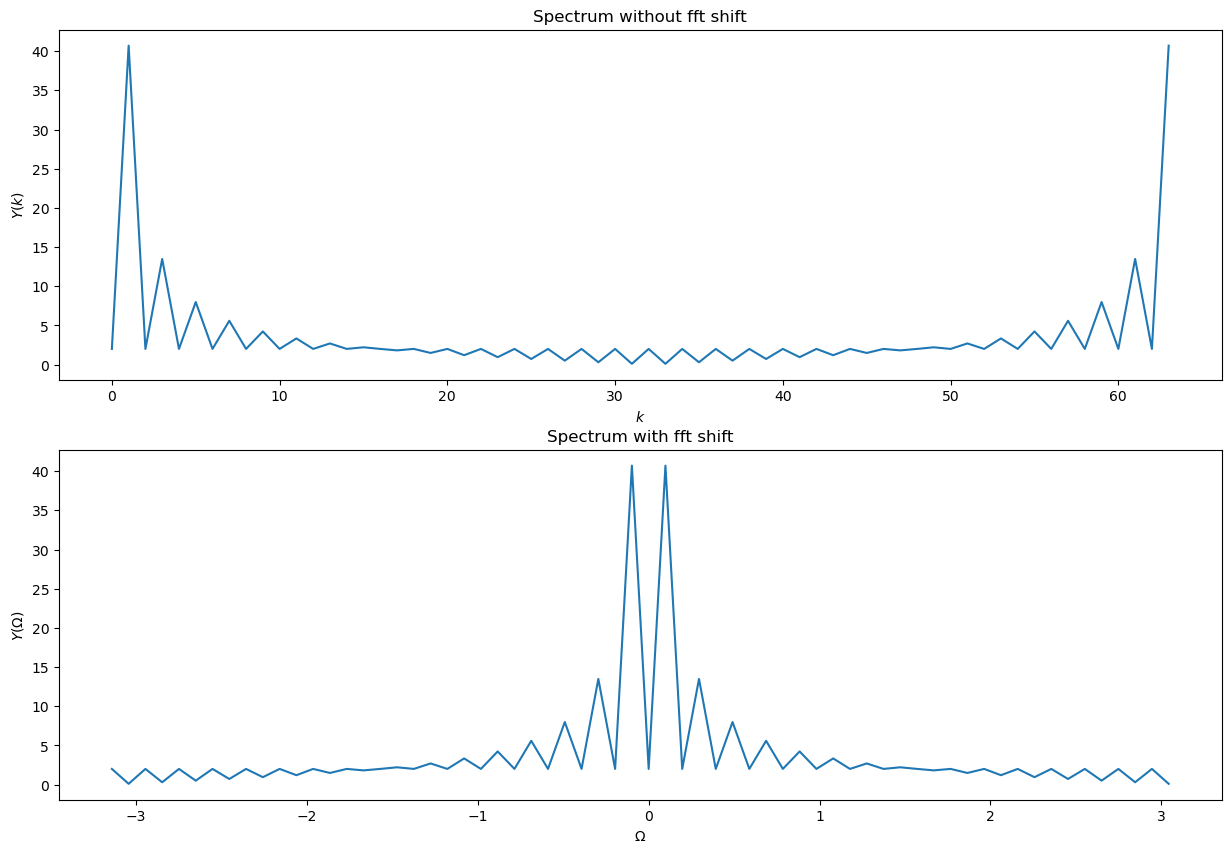

In [7]:
fig, ax = plt.subplots(2, figsize=(15, 10))

#spectrum without fftshift 
ax[0].plot( np.arange( Y_fft.size ) , np.abs( Y_fft ) )

ax[0].set_title('Spectrum without fft shift')
ax[0].set_ylabel('$Y(k)$')
ax[0].set_xlabel('$k$')

#spectrum without fftshift
ax[1].plot( (np.arange( Y_fft.size ) - ( Y_fft.size / 2 ) ) * 2 *
           np.pi / Y_fft.size, np.abs( np.fft.fftshift( Y_fft ) ) )

ax[1].set_title('Spectrum with fft shift')
ax[1].set_ylabel('$Y(\Omega)$')
ax[1].set_xlabel('$\Omega$')
